In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import librosa.display
import os

In [2]:
data = pd.read_csv('./csv_data/data2.csv')

In [4]:
def getPureSample(raw_data,start,end,sr=7000):
    '''
    Takes a numpy array and spilts its using start and end args
    
    raw_data=numpy array of audio sample
    start=time
    end=time
    sr=sampling_rate
    mode=mono/stereo
    
    '''
    max_ind = len(raw_data) 
    start_ind = min(int(start * sr), max_ind)
    end_ind = min(int(end * sr), max_ind)
    return raw_data[start_ind: end_ind]

In [5]:
import librosa as lb
import soundfile as sf
from tqdm import tqdm
i,c=0,0
for index,row in tqdm(data.iterrows()):
    maxLen=4
    start=row['start']
    end=row['end']
    filename=row['filename']
    
    #If len > maxLen , change it to maxLen
    if end-start>maxLen:
        end=start+maxLen
    
    audio_file_loc='./Respiratory_Sound_Database/audio_and_txt_files/' + filename + '.wav'
    
    if index > 0:
        #check if more cycles exits for same patient if so then add i to change filename
        if data.iloc[index-1]['filename']==filename:
            i+=1
        else:
            i=0
    filename= filename + '_' + str(i) + '.wav'
    
    save_path='processed_audio_files/' + filename
    c+=1
    
    audioArr,sampleRate=lb.load(audio_file_loc)
    pureSample=getPureSample(audioArr,start,end,sampleRate)
    
    #pad audio if pureSample len < max_len
    reqLen=6*sampleRate
    padded_data = lb.util.pad_center(pureSample, reqLen)
    
    sf.write(file=save_path,data=padded_data,samplerate=sampleRate)
print('Total Files Processed: ',c)

0it [00:00, ?it/s]<ipython-input-5-c81da776a90f>:33: FutureWarning: Pass size=132300 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  padded_data = lb.util.pad_center(pureSample, reqLen)
1it [00:00,  3.72it/s]<ipython-input-5-c81da776a90f>:33: FutureWarning: Pass size=132300 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  padded_data = lb.util.pad_center(pureSample, reqLen)
2it [00:00,  3.91it/s]<ipython-input-5-c81da776a90f>:33: FutureWarning: Pass size=132300 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  padded_data = lb.util.pad_center(pureSample, reqLen)
3it [00:00,  3.85it/s]<ipython-input-5-c81da776a90f>:33: FutureWarning: Pass size=132300 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  padded_data = lb.util.pad_center(pureSample, reqLen)
4it [00:01,  4.00it/s]<ipython-input-5-c

Total Files Processed:  10089


<AxesSubplot:ylabel='pid'>

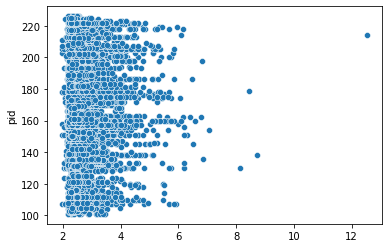

In [3]:
sns.scatterplot(x=(data.end-data.start), y=data.pid, )

<AxesSubplot:>

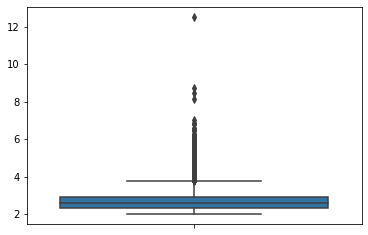

In [4]:
sns.boxplot(y=(data.end-data.start))

In [5]:
diagnosis=pd.read_csv('./Respiratory_Sound_Database/patient_diagnosis.csv',names=['pid','disease'])
diagnosis.head()

,pid,disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI


/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

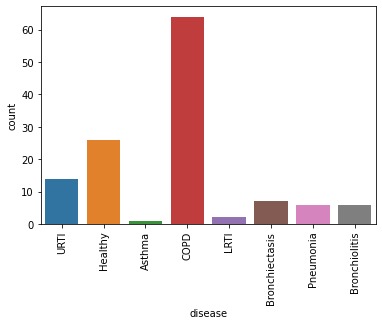

In [6]:
sns.countplot(diagnosis.disease)
plt.xticks(rotation=90)

In [7]:
from tqdm import tqdm
def extractId(filename):
    return filename.split('_')[0]
path='./processed_audio_files/'
length=len(os.listdir(path))
index=range(length)
i=0
files_df=pd.DataFrame(index=index,columns=['pid','filename'])
file_list = os.listdir(path)
for f in tqdm(file_list):
    files_df.iloc[i]['pid']=extractId(f)
    files_df.iloc[i]['filename']=f
    i+=1
files_df.head()

100%|██████████| 10391/10391 [00:01<00:00, 7179.62it/s]


,pid,filename
0,215,215_1b3_Tc_sc_Meditron_6.wav
1,204,204_7p5_Tc_mc_AKGC417L_0.wav
2,130,130_1p4_Pl_mc_AKGC417L_2.wav
3,174,174_1p3_Ll_mc_AKGC417L_0.wav
4,104,104_1b1_Ll_sc_Litt3200_0.wav


In [8]:
files_df.pid=files_df.pid.astype('int64') # both pid's must be of same dtype for them to merge
data=pd.merge(files_df,diagnosis,on='pid')
data.head()

,pid,filename,disease
0,215,215_1b3_Tc_sc_Meditron_6.wav,Bronchiectasis
1,215,215_1b3_Tc_sc_Meditron_2.wav,Bronchiectasis
2,215,215_1b2_Ar_sc_Meditron_1.wav,Bronchiectasis
3,215,215_1b2_Ar_sc_Meditron_4.wav,Bronchiectasis
4,215,215_1b3_Tc_sc_Meditron_0.wav,Bronchiectasis


/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Bronchiectasis'),
  Text(1, 0, 'COPD'),
  Text(2, 0, 'URTI'),
  Text(3, 0, 'Healthy'),
  Text(4, 0, 'Pneumonia'),
  Text(5, 0, 'Bronchiolitis'),
  Text(6, 0, 'LRTI'),
  Text(7, 0, 'Asthma')])

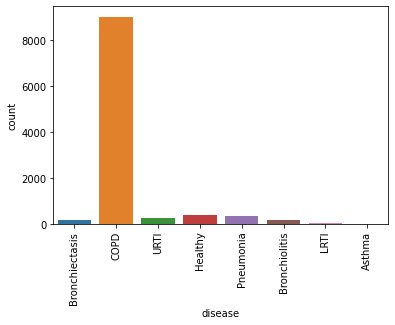

In [9]:
sns.countplot(data.disease)
plt.xticks(rotation=90)

In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xval,ytrain,yval=train_test_split(data,data.disease,stratify=data.disease,random_state=42,test_size=0.25)

In [11]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

COPD              0.867958
Healthy           0.035288
Pneumonia         0.034518
URTI              0.025921
Bronchiectasis    0.015912
Bronchiolitis     0.015783
LRTI              0.003208
Asthma            0.001412
Name: disease, dtype: float64

In [12]:
Xtrain.disease.value_counts()/Xtrain.shape[0]

COPD              0.867958
Healthy           0.035288
Pneumonia         0.034518
URTI              0.025921
Bronchiectasis    0.015912
Bronchiolitis     0.015783
LRTI              0.003208
Asthma            0.001412
Name: disease, dtype: float64

[Text(0.5, 1.0, 'MFCC')]

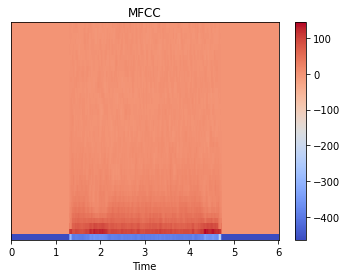

In [13]:
path='./processed_audio_files/'
import librosa as lb
import librosa.display

file=path + Xtrain.iloc[193].filename 
sound,sample_rate=lb.load(file)
mfccs = lb.feature.mfcc(y=sound, sr=sample_rate, n_mfcc=40)
fig, ax = plt.subplots()
img = librosa.display.specshow(mfccs, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='MFCC')

In [14]:
Xtrain.to_csv('train1.csv')
Xval.to_csv('val1.csv')

In [15]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import librosa.display as lbd

In [16]:
train=pd.read_csv('./train1.csv')
val=pd.read_csv('./val1.csv')
train.head()

,Unnamed: 0,pid,filename,disease
0,3444,133,133_2p2_Tc_mc_AKGC417L_16.wav,COPD
1,8316,222,222_1b1_Ar_sc_Meditron_0.wav,COPD
2,4437,146,146_2b4_Lr_mc_AKGC417L_1.wav,COPD
3,7956,176,176_2b3_Ar_mc_AKGC417L_12.wav,COPD
4,9305,175,175_1b1_Ar_sc_Litt3200_0.wav,COPD


In [17]:
ytrain=train.disease
yval=val.disease
yval

0       COPD
1       COPD
2       COPD
3       COPD
4       COPD
        ... 
2593    COPD
2594    COPD
2595    COPD
2596    COPD
2597    COPD
Name: disease, Length: 2598, dtype: object

/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='disease', ylabel='count'>

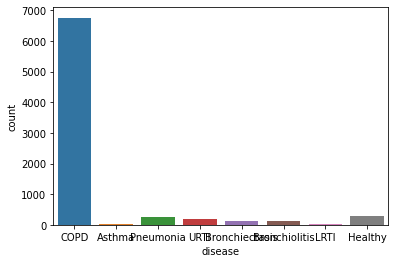

In [18]:
sns.countplot(train.disease)

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ytrain=le.fit_transform(ytrain)
yval=le.transform(yval)

In [23]:
def getFeatures(path):
    soundArr,sample_rate=lb.load(path)
    mfcc=lb.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=lb.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=lb.feature.melspectrogram(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec

In [24]:
import librosa as lb
import soundfile as sf
from tqdm import tqdm
root='./processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in tqdm(val.iterrows()):
    path=root + row['filename']
    a,b,c=getFeatures(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
    
mfcc_val=np.array(mfcc)
cstft_val=np.array(cstft)
mSpec_val=np.array(mSpec)

5it [00:00,  5.46it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
7it [00:01,  5.46it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
8it [00:01,  5.59it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
9it [00:01,  5.13it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
10it [00:01,  5.23it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: Us

In [25]:
root='./processed_audio_files/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in tqdm(train.iterrows()):
    path=root + row['filename']
    a,b,c=getFeatures(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)
    # tone.append(d)
    # specCen.append(e)
    
mfcc_train=np.array(mfcc)
cstft_train=np.array(cstft)
mSpec_train=np.array(mSpec)

1it [00:00,  3.23it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
3it [00:00,  3.34it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
9it [00:02,  3.51it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
14it [00:04,  3.52it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to estimate tuning from empty frequency set.
  return f(*args, **kwargs)
19it [00:05,  3.58it/s]/home/gurnameh/dev/MLproj/housing_model/env/lib/python3.8/site-packages/librosa/util/decorators.py:88: U

In [28]:
np.save('mfcc_train.npy', mfcc_train)
np.save('mfcc_val.npy', mfcc_val)
np.save('cstft_train.npy', cstft_train)
np.save('cstft_val.npy', cstft_val)
np.save('mSpec_train.npy', mSpec_train)
np.save('mSpec_val.npy', mSpec_val)

In [20]:
# mfcc_train = np.load('./mfcc_train.npy')
mfcc_val = np.load('./mfcc_val.npy')
# cstft_train = np.load('./cstft_train.npy')
cstft_val = np.load('./cstft_val.npy')
# mSpec_train = np.load('./mSpec_train.npy')
mSpec_val = np.load('./mSpec_val.npy')

NameError: name 'mSpec_train' is not defined

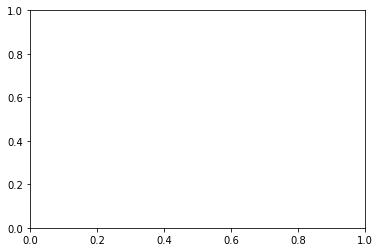

In [21]:
root = './processed_audio_files/'
fig, ax = plt.subplots()
soundArr,sample_rate=lb.load(root + Xtrain.iloc[0].filename)
S_dB = librosa.power_to_db(mSpec_train[0], ref=np.max)
img = librosa.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency spectrogram')

In [22]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=3, min_lr=0.00001,mode='min')
]

In [23]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=tf.keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(96,2,padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(128,2,padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=tf.keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=tf.keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [25]:
mfcc_model.summary()

Model: "mfccModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mfccInput (InputLayer)      [(None, 20, 259, 1)]      0         
                                                                 
 conv2d (Conv2D)             (None, 20, 87, 32)        832       
                                                                 
 batch_normalization (BatchN  (None, 20, 87, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 20, 87, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 43, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 22, 64)        18

In [26]:
croma_input=tf.keras.layers.Input(shape=(12,259,1),name="cromaInput")
x=tf.keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(croma_input)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(96,2,padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(128,2,padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
croma_output=tf.keras.layers.GlobalMaxPooling2D()(x)

croma_model=tf.keras.Model(croma_input, croma_output, name="cromaModel")

In [27]:
croma_model.summary()

Model: "cromaModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cromaInput (InputLayer)     [(None, 12, 259, 1)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 87, 32)        832       
                                                                 
 batch_normalization_4 (Batc  (None, 12, 87, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 12, 87, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 43, 32)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 22, 64)         1

In [28]:
mSpec_input=tf.keras.layers.Input(shape=(128,259,1),name="mSpecInput")
x=tf.keras.layers.Conv2D(32,5,strides=(2,3),padding='same')(mSpec_input)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(64,3,strides=(2,2),padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(96,2,padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
x=tf.keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=tf.keras.layers.Conv2D(128,2,padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.Activation(keras.activations.relu)(x)
mSpec_output=tf.keras.layers.GlobalMaxPooling2D()(x)

mSpec_model=keras.Model(mSpec_input, mSpec_output, name="mSpecModel")

In [29]:
mSpec_model.summary()

Model: "mSpecModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mSpecInput (InputLayer)     [(None, 128, 259, 1)]     0         
                                                                 
 conv2d_8 (Conv2D)           (None, 64, 87, 32)        832       
                                                                 
 batch_normalization_8 (Batc  (None, 64, 87, 32)       128       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 64, 87, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 43, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 22, 64)        1

In [30]:
input_mfcc=tf.keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_croma=tf.keras.layers.Input(shape=(12,259,1),name="croma")
croma=croma_model(input_croma)

input_mSpec=tf.keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mSpec_model(input_mSpec)


concat=tf.keras.layers.concatenate([mfcc,croma,mSpec])
hidden=tf.keras.layers.Dropout(0.2)(concat)
hidden=tf.keras.layers.Dense(50,activation='relu')(concat)
hidden=tf.keras.layers.Dropout(0.3)(hidden)
hidden=tf.keras.layers.Dense(25,activation='relu')(hidden)
hidden=tf.keras.layers.Dropout(0.3)(hidden)
output=tf.keras.layers.Dense(8,activation='softmax')(hidden)

net=tf.keras.Model([input_mfcc,input_croma,input_mSpec], output, name="Net")

In [31]:
net.summary()

Model: "Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 mfcc (InputLayer)              [(None, 20, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 croma (InputLayer)             [(None, 12, 259, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 mspec (InputLayer)             [(None, 128, 259, 1  0           []                               
                                )]                                                              

In [32]:
tf.keras.utils.plot_model(net, "net.png", show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [33]:
from keras import backend as K
net.compile(loss='sparse_categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])
K.set_value(net.optimizer.learning_rate, 0.001)

In [34]:
history=net.fit(
    {"mfcc":mfcc_train,"croma":cstft_train,"mspec":mSpec_train},
    ytrain,
    validation_data=({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

Epoch 1/100
244/244 [==============================] - 17s 39ms/step - loss: 0.5727 - accuracy: 0.8496 - val_loss: 0.6682 - val_accuracy: 0.8680 - lr: 0.0010
Epoch 2/100
244/244 [==============================] - 8s 33ms/step - loss: 0.4134 - accuracy: 0.8691 - val_loss: 0.3684 - val_accuracy: 0.8841 - lr: 0.0010
Epoch 3/100
244/244 [==============================] - 8s 33ms/step - loss: 0.3411 - accuracy: 0.8803 - val_loss: 0.3732 - val_accuracy: 0.8845 - lr: 0.0010
Epoch 4/100
244/244 [==============================] - 8s 33ms/step - loss: 0.3089 - accuracy: 0.8895 - val_loss: 0.4273 - val_accuracy: 0.8526 - lr: 0.0010
Epoch 5/100
244/244 [==============================] - 8s 33ms/step - loss: 0.2884 - accuracy: 0.8929 - val_loss: 0.2880 - val_accuracy: 0.8953 - lr: 0.0010
Epoch 6/100
244/244 [==============================] - 8s 33ms/step - loss: 0.2810 - accuracy: 0.8963 - val_loss: 0.4620 - val_accuracy: 0.8191 - lr: 0.0010
Epoch 7/100
244/244 [==============================] - 8s

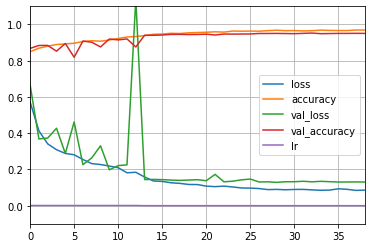

In [35]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(-0.1,1.1)
plt.show()

In [38]:
del mfcc_train
del mSpec_train
del cstft_train

In [24]:
net = keras.models.load_model('./my_model2.h5')

In [25]:
net.evaluate({"mfcc":mfcc_val,"croma":cstft_val,"mspec":mSpec_val},yval)

82/82 [==============================] - 3s 12ms/step - loss: 0.1305 - accuracy: 0.9507


[0.13046438992023468, 0.9507313370704651]

In [40]:
# net.save("my_model2")

INFO:tensorflow:Assets written to: my_model2/assets


In [41]:
# net.save("my_model2.h5")

In [26]:
yval[0]

3

In [38]:
integer_mapping = {l: i for i, l in enumerate(le.classes_)}
integer_mapping

{'Asthma': 0,
 'Bronchiectasis': 1,
 'Bronchiolitis': 2,
 'COPD': 3,
 'Healthy': 4,
 'LRTI': 5,
 'Pneumonia': 6,
 'URTI': 7}

In [47]:
res = net.predict({"mfcc": np.expand_dims(mfcc_val[13], axis=0),
             "croma":np.expand_dims(cstft_val[13], axis=0),
             "mspec":np.expand_dims(mSpec_val[13], axis=0)})

In [48]:
np.argmax(res)

3

In [57]:
yval[79]

3

In [50]:
inv_mapping = {v: k for k, v in integer_mapping.items()}

In [46]:
inv_mapping[np.argmax(res)]

'COPD'